## Artificial Neural Network -- Assignment 1

In this section, you will build and fit several NN models to the dataset
 `winequality-red.csv`, which rates the quality of red variants of the Portuguese "Vinho Verde" wine according to a variety of chemical properties:

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality (continuous score between 0 and 10)

**You will use deep learning for regression to predict `quality` variable**:

## **Install and import needed libraries**

In [3]:
!pip install torchview

import torch
import torch.nn as nn
from torchview import draw_graph
from fastai.tabular.all import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

## **Data Preparation**

#### **Load Data**
Run the code below to load the dataset

In [4]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSXznmcXoHsnmcRgMl-4UQK_O0xsjHOgknGTzZGWwUP6vHffTYJ2-_QNtwmJCbELi8in3msD3dVFTzF/pub?gid=456238604&single=true&output=csv"
df = pd.read_csv(url)

#### **Scale the data with z-score normalization, convert to PyTorch tensors, and define DataLoaders.**

In [5]:
# Apply z-score normalization separately to prevent data leakage.

# Separate features and target
X = df
y = df['quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
X_train.shape

(914, 12)

In [7]:
# Apply z-score normalization
train_mean = X_train.mean()
train_std = X_train.std()

X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std # Use training set mean and std for testing set



In [24]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_test_tensor= torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [25]:
#Create dataset object
train_ds = list(zip(X_train_tensor, y_train))

#print(train_ds)
valid_ds = list(zip(X_test_tensor, y_test))

#print(valid_ds.head(1))
# Define the DataLoaders

train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=64, shuffle=True)

dls = DataLoaders(train_dl, valid_dl)

## **Model 1:**



### **1. Build a neural network (Model 1)**
Model 1 should have:
* The correct number of input neurons.
* One hidden layer with between 16 and 128 neurons, and an appropriately picked activation function.
* One output neuron.

In [26]:


model_1 = nn.Sequential(
    nn.Linear(12, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)



### **2. Visualize Model 1 using draw_graph.**

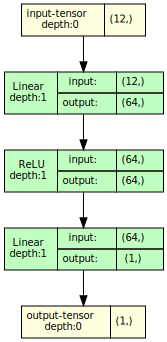

In [11]:
model_graph = draw_graph(model_1, input_size=(12,))
model_graph.visual_graph

### **3. Fit the Model**

In [28]:
# Define the loss function
loss_func = nn.MSELoss()

# Create the Learner object
learn = Learner(dls, model_1, loss_func=loss_func, metrics=[rmse])

# Train the model
learn.fit(n_epoch=10, lr=0.001)

epoch,train_loss,valid_loss,_rmse,time
0,1.518335,1.658272,1.287739,00:00
1,1.306184,1.372599,1.171580,00:00
2,1.131958,1.144130,1.069640,00:00
3,0.999474,0.982215,0.991068,00:00
4,0.890100,0.853815,0.924021,00:00
5,0.802966,0.768344,0.876552,00:00
6,0.731262,0.700247,0.836808,00:00
7,0.670305,0.642800,0.801748,00:00
8,0.620145,0.585157,0.764955,00:00
9,0.571883,0.539012,0.734174,00:00


### **4. Evaluate the Model**

In [29]:
# Evaluate the model on the validation set
valid_preds, valid_targets = learn.get_preds()
rmse_score = rmse(valid_preds, valid_targets)
print("Validation RMSE:", rmse_score.item())


Validation RMSE: 0.7341740727424622


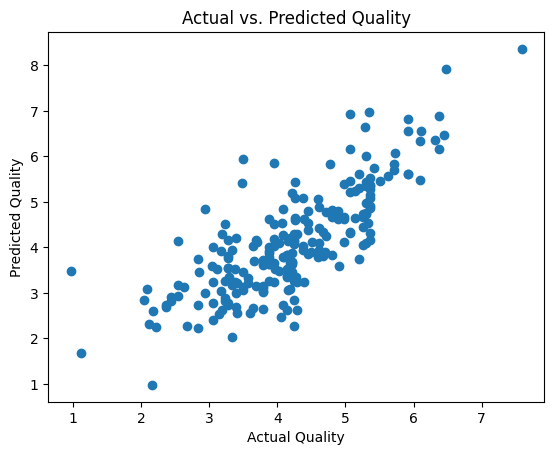

In [30]:

valid_preds_np = valid_preds.squeeze().numpy()
valid_targets_np = valid_targets.numpy()

#create a scatter plot
plt.scatter(valid_targets_np, valid_preds_np)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted Quality')
plt.show()

## **Model 2:**

### **1. Build a neural network (Model 1)**
Model 1 should have:
* The correct number of input neurons.
* Two hidden layers. The first has between 16 and 64 neurons, and the second has between 8-32 neurons. Pick the activation function ReLU for both layers.
* One output neuron.

In [31]:
model_2 = nn.Sequential(
    nn.Linear(12, 24),
    nn.ReLU(),
    nn.Linear(24, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

### **2. Visualize Model 1 using draw_graph**

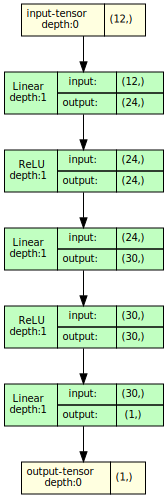

In [32]:
model_graph = draw_graph(model_2, input_size=(12,))
model_graph.visual_graph

### **3. Fit the Model**

In [34]:
# Define the loss function
loss_func = nn.MSELoss()

# Create the Learner object
learn1 = Learner(dls, model_2, loss_func=loss_func, metrics=[rmse])

# Train the model
learn1.fit(n_epoch=10, lr=0.001)

epoch,train_loss,valid_loss,_rmse,time
0,0.644080,0.730540,0.854716,00:00
1,0.554601,0.585969,0.765486,00:00
2,0.490781,0.488110,0.698649,00:00
3,0.442202,0.422683,0.650141,00:00
4,0.397931,0.374048,0.611594,00:00
5,0.362439,0.332773,0.576865,00:00
6,0.328880,0.294601,0.542772,00:00
7,0.299794,0.263099,0.512932,00:00
8,0.271926,0.237393,0.487230,00:00
9,0.249532,0.214847,0.463516,00:00


### **4. Evaluate the Model**

In [35]:
# Evaluate the model on the validation set
valid_preds, valid_targets = learn1.get_preds()
rmse_score = rmse(valid_preds, valid_targets)
print("Validation RMSE:", rmse_score.item())

Validation RMSE: 0.4635160267353058


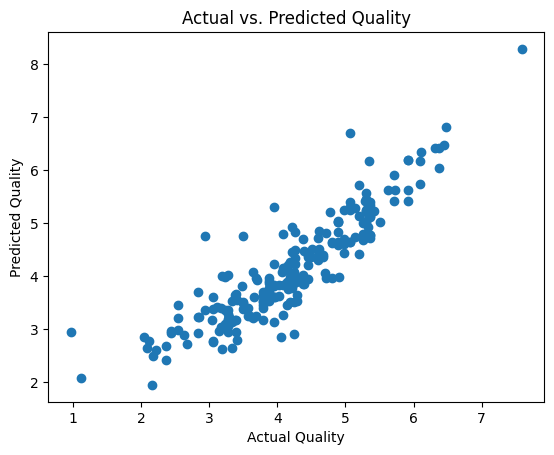

In [36]:
#converted tensor back to numpy to plot
valid_preds_np = valid_preds.squeeze().numpy()
valid_targets_np = valid_targets.numpy()

#create a scatter plot
plt.scatter(valid_targets_np, valid_preds_np)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted Quality')
plt.show()